In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
haberman = pd.read_csv("haberman.csv")

In [56]:
print(haberman.shape)
print(haberman.columns)
haberman.head(15)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


# 1 ---- Patients wouldn't gonna die in next 5 years
# 2 ---- Patient will die within next 5 years

In [57]:
#How many data points for each class are present? 
print(haberman["status"].value_counts())

1    225
2     81
Name: status, dtype: int64


Observation: independent variable = age, year and nodes......
             dependent variable = status......
             imbalanced data set

# 2D Scatter Plot

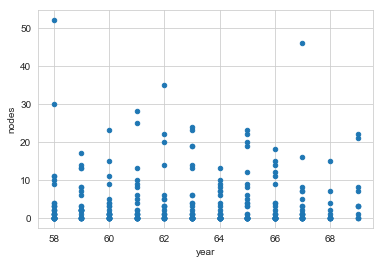

In [58]:
haberman.plot(kind="scatter",x="year",y="nodes")
plt.show()

# Can't make more sense out it. What if do color the data points according to their class

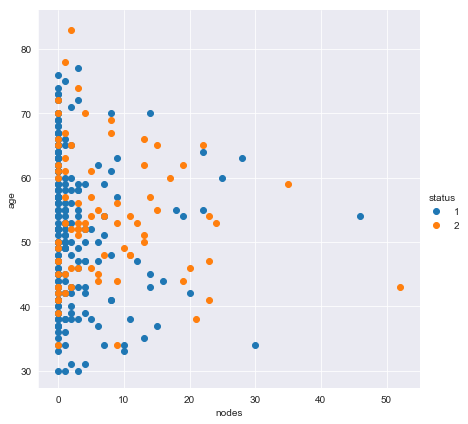

In [59]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman,hue="status",height=6).map(plt.scatter,"nodes","age").add_legend()
plt.show()

## still we are not able to distinguish the diffrence

#  So now we will move to pairplots to diffrenciate b/w every feature
##   3c2 = 3

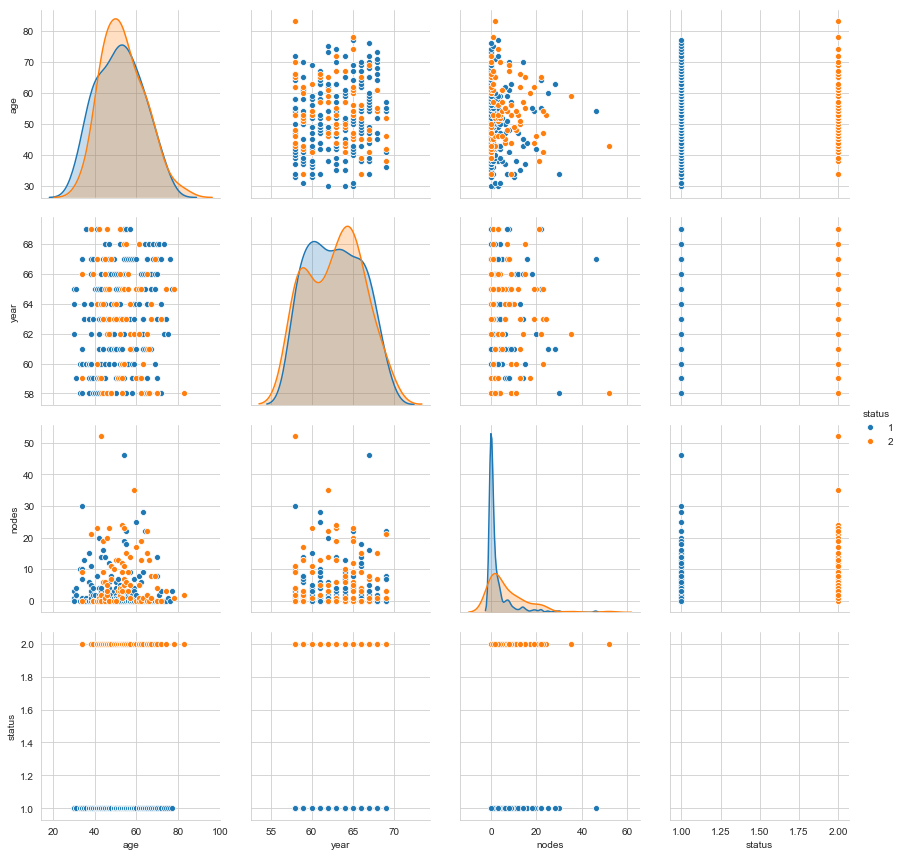

In [60]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",height=3)
plt.show()

# Here year and nodes  are looking  better feature to detect b/w status 1 and 2

## But still we are unable to visualize properly b'coz still we can't use if else condition

# So Now we move to 1D scatter plot like Histogram PDF, CDF   using only one feature

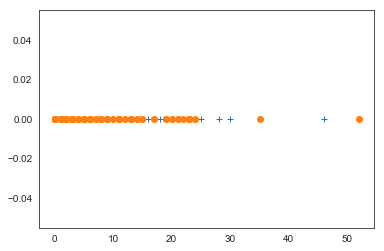

In [71]:
sns.set_style("white")
haberman_1 = haberman.loc[haberman["status"]== 1]
haberman_2 = haberman.loc[haberman["status"]== 2]

plt.plot(haberman_1["nodes"],   np.zeros_like(haberman_1["nodes"]), "+")
plt.plot(haberman_2["nodes"],    np.zeros_like(haberman_2["nodes"]),"o")

plt.show()

# still hard to visualize b'coz of overlapping points wrt to each other
# so we should try distribution plot

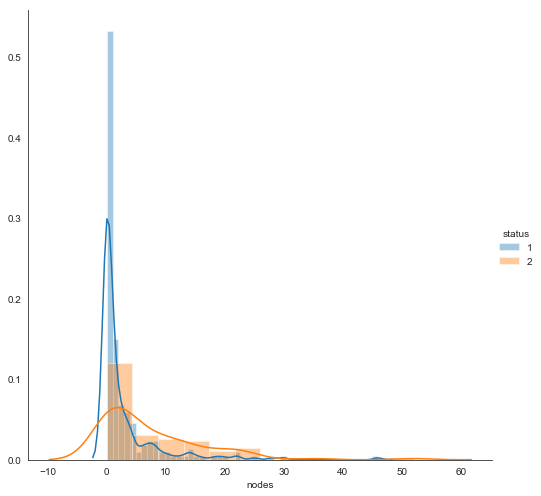

In [74]:
sns.FacetGrid(haberman,hue="status",height=7).map(sns.distplot,"nodes").add_legend()

# Now  CDF and PDF

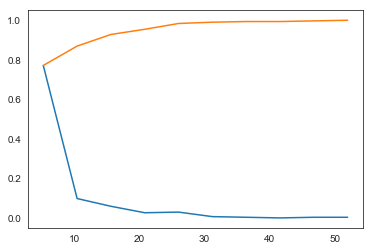

In [91]:
array, bins =np.histogram(haberman["nodes"],bins=10,density = True)
pdf = array/sum(array)
cdf= np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)

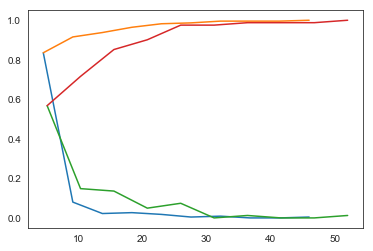

In [92]:
array, bins =np.histogram(haberman_1["nodes"],bins=10,density = True)
pdf = array/sum(array)
cdf= np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)


array, bins =np.histogram(haberman_2["nodes"],bins=10,density = True)
pdf = array/sum(array)
cdf= np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)

# Affected by Outliers
## Mean, var, std

In [95]:
print(np.mean(haberman_1["status"]))
np.mean(haberman_2["status"])


1.0


2.0

In [100]:
print(np.std(haberman_1["status"]))
np.std(haberman_2["status"])

0.0


0.0

#### sum of values above the mean and below the mean is equal

# Not affected by the outliers
# Median, Percentile, Quantile, IQR, MAD

In [101]:
print(np.median(haberman_1["status"]))
np.median(haberman_2["status"])

1.0


2.0

In [106]:
print(np.percentile(haberman_1["status"],np.arange(0,100,25)))

[1. 1. 1. 1.]


In [108]:
from statsmodels import robust
robust.mad(haberman_1["status"])

0.0